### Task - 3

##### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

Name: NITHISH KUMAR B

Task - trying to find out the areas where you can work to make more profit by using python.

### IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('SampleSuperstore.csv')

In [2]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### SHAPE AND COLUMNS

In [3]:
df.shape

(9994, 13)

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Check for null values

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Removing Duplicate values

In [6]:
df = df.drop_duplicates()
df.shape

(9977, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


### Statistical info

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


#### continuous categorical to categorical

In [9]:
for i in df.columns:
    u = df[i].unique()
    if(len(u)<20) and ((df[i].dtypes=="int64")or(df[i].dtypes=="float64")):
        print(i,"seem to category but it is integer datatype")

Quantity seem to category but it is integer datatype
Discount seem to category but it is integer datatype


In [10]:
df["Discount"] = df["Discount"].astype(str)
df["Quantity"] = df["Quantity"].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   object 
 11  Discount      9977 non-null   object 
 12  Profit        9977 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [12]:
df = df.drop(columns = ['Postal Code'], axis = 1)

### Checking Unique Values
where country column has only one value so i gonna drop that

Profit and Sales columns contain continuous variable other are category

In [13]:
for i in df.columns:
    print(i,"has",len(df[i].unique()),"values")

Ship Mode has 4 values
Segment has 3 values
Country has 1 values
City has 531 values
State has 49 values
Region has 4 values
Category has 3 values
Sub-Category has 17 values
Sales has 5825 values
Quantity has 14 values
Discount has 12 values
Profit has 7287 values


In [14]:
df = df.drop(columns = ['Country'], axis = 1)
df.shape

(9977, 11)

creating a new column with help of available data

In [15]:
data = df.copy()
status = []
for i in df['Profit']:
    if i>0:
        status+=['Profit']
    elif i<0:
        status+=['Loss']
    else:
        status+=["neither profit nor loss"]

In [16]:
data['status'] = status
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,status
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.0,41.9136,Profit
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.0,219.5820,Profit
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.0,6.8714,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Loss
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.2,2.5164,Profit


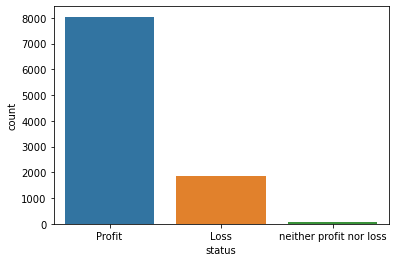

In [17]:
sns.countplot(data['status'])

In [18]:
pd.crosstab(data['status'],columns ='count')

col_0,count
status,
Loss,1869
Profit,8043
neither profit nor loss,65


Relation Between Discount and Sales

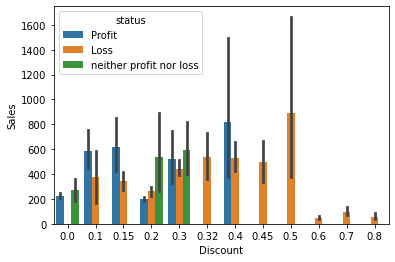

In [19]:
sns.barplot(data['Discount'],data['Sales'],hue = data['status'])

In [20]:
## function for count 
def counting(d,val):
    values = 0
    for i in d:
        if i== val:
            values+=1
    return values

## create pie chat
def plot_pie(dataframe,col,index,t):
    fig = plt.figure(figsize = t)
    dataframe.index = index
    dataframe[col].plot.pie()
    plt.show()
    

## print information from the given data
def report(d,uniq):
    profit = d['Profit'].tolist()
    loss = d['Loss'].tolist()
    for i in range(1,4):
        if i == 1:
            print("\n{} has the highest profit of {}%\n".format(uniq[profit.index(max(profit))],max(profit)))
        else:
            uniq.remove(uniq[profit.index(max(profit))])
            profit.remove(max(profit))
            print("{} has {} preference with profit of {}%".format(uniq[profit.index(max(profit))],i,max(profit)))

            
## Detialed report column
def show_detial(col,dataframe,t,size,plot = None,top = None):
    fig = plt.figure(figsize = t)
    A = ['Profit','Loss']
    P = len(dataframe)
    if top:
        u = np.array(top)
    else:
        u = dataframe[col].unique()
    i = 1
    d = {"Values":u}
    for stat in A:
        ax = fig.add_subplot(1,2,i)
        count = []
        for uniq in u:
            count+=[counting(dataframe[dataframe['status']==stat][col].values,uniq)]
        d[stat] = count
        sns.barplot(u,count)
        plt.xticks(rotation=70)
        plt.title(stat+" in "+col)
        if plot == True:
            plt.plot(count)
        i+=1
    plt.show()
    for stat in A:
        count = d[stat]
        percent = []
        for i in count:
               percent+=[round((i/P)*100,2)]
        d[stat] = percent
    new_data = pd.DataFrame(d)
    new_data['Total'] = new_data['Profit']+new_data['Loss']
    plot_pie(new_data,'Profit',u,(t[0]-size,t[1]+size))
    print("Profit and Loss percentage in the given columns are below")
    print("="*20,"Report","="*20)
    report(new_data,u.tolist())
    return new_data

Region column

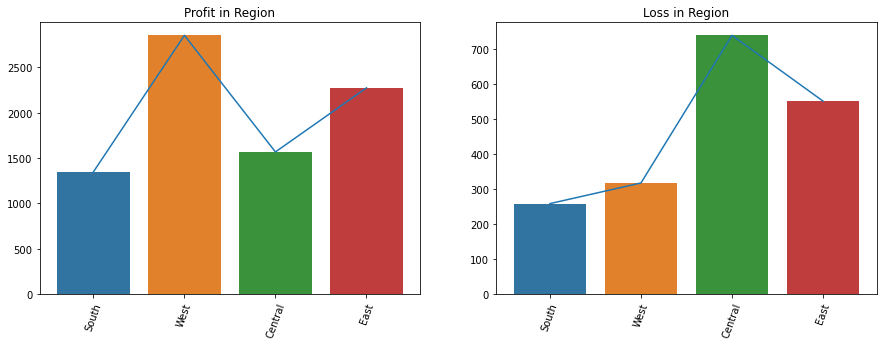

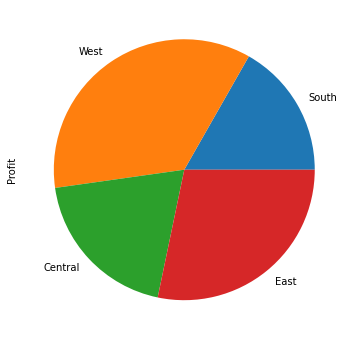

Profit and Loss percentage in the given columns are below
==================== Report ====================

West has the highest profit of 28.6%

East has 2 preference with profit of 22.79%
Central has 3 preference with profit of 15.72%


,Values,Profit,Loss,Total
South,South,13.51,2.60,16.11
West,West,28.60,3.19,31.79
Central,Central,15.72,7.42,23.14
East,East,22.79,5.53,28.32


In [21]:
show_detial('Region',data,(15,5),1,plot = True)

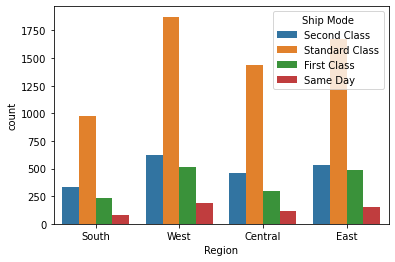

In [22]:
sns.countplot('Region',hue = 'Ship Mode',data = data)

Prefered Standard class in all Region

Ship Mode

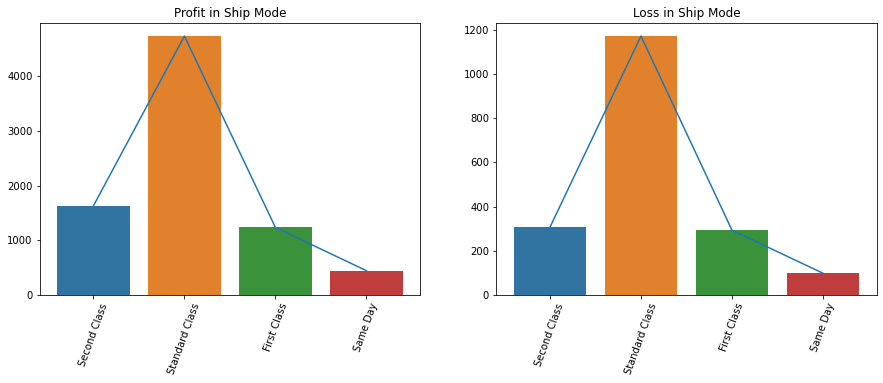

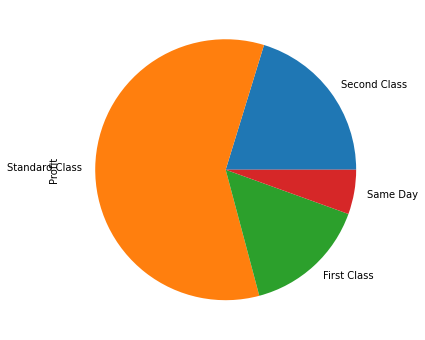

Profit and Loss percentage in the given columns are below
==================== Report ====================

Standard Class has the highest profit of 47.48%

Second Class has 2 preference with profit of 16.33%
First Class has 3 preference with profit of 12.37%


,Values,Profit,Loss,Total
Second Class,Second Class,16.33,3.07,19.40
Standard Class,Standard Class,47.48,11.75,59.23
First Class,First Class,12.37,2.94,15.31
Same Day,Same Day,4.44,0.98,5.42


In [23]:
show_detial('Ship Mode',data,(15,5),1,plot=True)

Segment

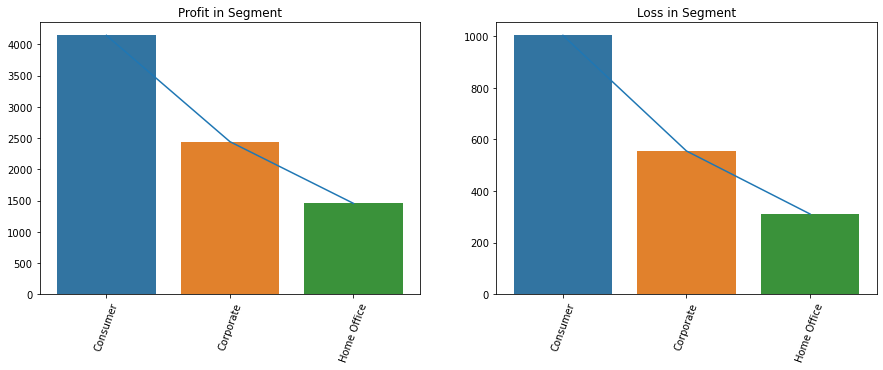

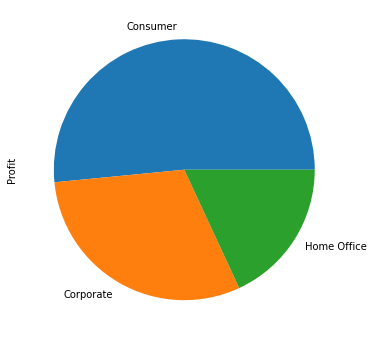

Profit and Loss percentage in the given columns are below
==================== Report ====================

Consumer has the highest profit of 41.55%

Corporate has 2 preference with profit of 24.49%
Home Office has 3 preference with profit of 14.58%


,Values,Profit,Loss,Total
Consumer,Consumer,41.55,10.05,51.60
Corporate,Corporate,24.49,5.56,30.05
Home Office,Home Office,14.58,3.12,17.70


In [24]:
show_detial('Segment',data,(15,5),1,plot = True)

Category

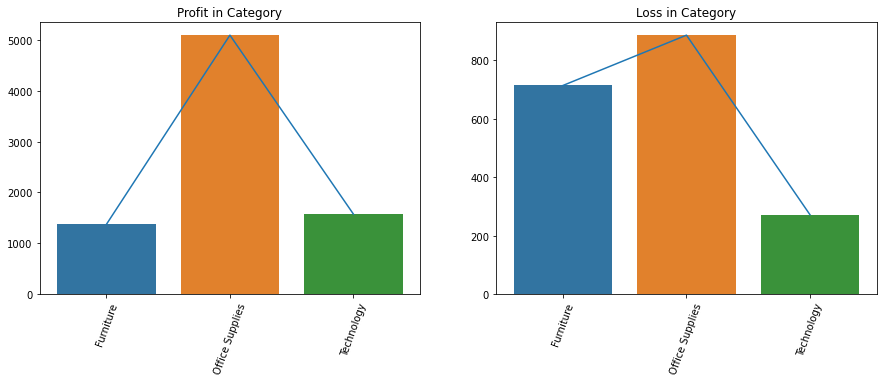

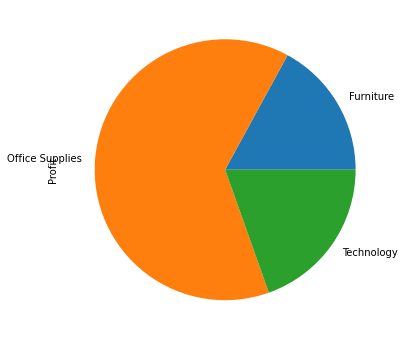

Profit and Loss percentage in the given columns are below
==================== Report ====================

Office Supplies has the highest profit of 51.1%

Technology has 2 preference with profit of 15.77%
Furniture has 3 preference with profit of 13.75%


In [25]:
detial = show_detial('Category',data,(15,5),1,plot = True)

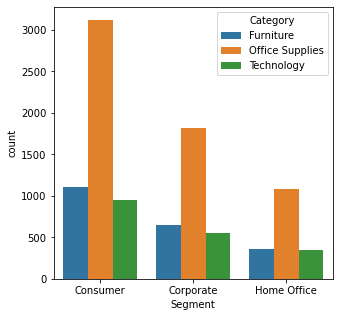

In [26]:
figure = plt.figure(figsize=(5,5))
sns.countplot('Segment',hue = 'Category',data = data)

Prefered Office class in all Segment

Sub-Category

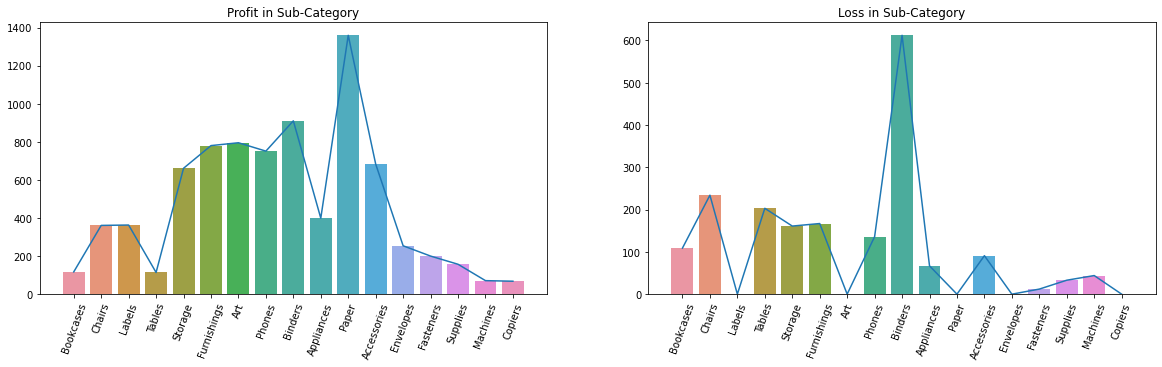

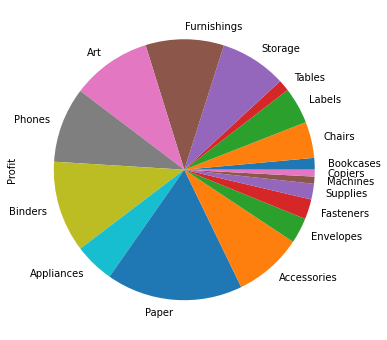

Profit and Loss percentage in the given columns are below
==================== Report ====================

Paper has the highest profit of 13.62%

Binders has 2 preference with profit of 9.12%
Art has 3 preference with profit of 7.97%


,Values,Profit,Loss,Total
Bookcases,Bookcases,1.17,1.09,2.26
Chairs,Chairs,3.62,2.35,5.97
Labels,Labels,3.64,0.00,3.64
Tables,Tables,1.14,2.03,3.17
Storage,Storage,6.63,1.61,8.24
Furnishings,Furnishings,7.82,1.67,9.49
Art,Art,7.97,0.00,7.97
Phones,Phones,7.53,1.36,8.89
Binders,Binders,9.12,6.13,15.25
Appliances,Appliances,4.00,0.67,4.67


In [27]:
show_detial('Sub-Category',data,(20,5),1,plot=True)

Quantity

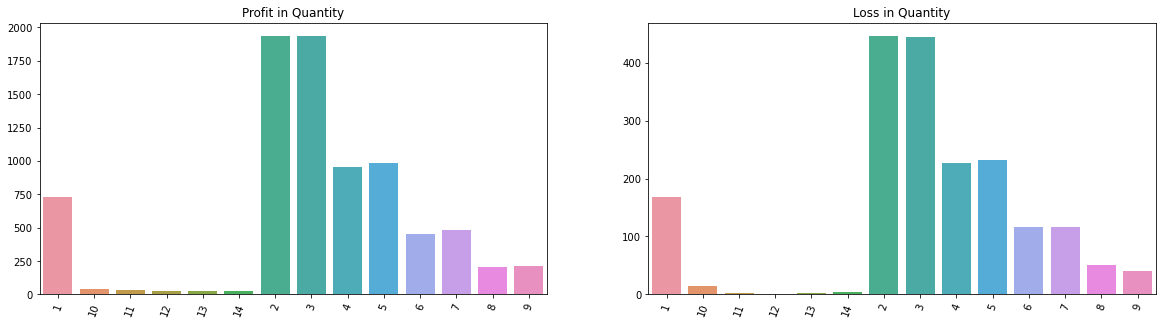

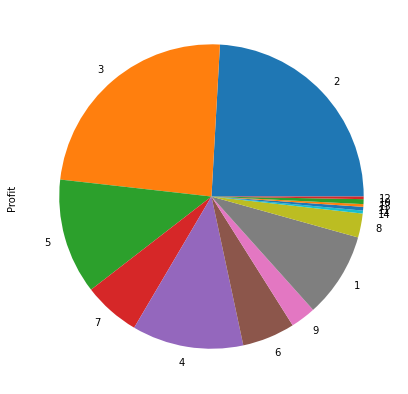

Profit and Loss percentage in the given columns are below
==================== Report ====================

2 has the highest profit of 19.43%

3 has 2 preference with profit of 19.43%
5 has 3 preference with profit of 9.88%


,Values,Profit,Loss,Total
2,2,19.43,4.48,23.91
3,3,19.43,4.46,23.89
5,5,9.88,2.33,12.21
7,7,4.87,1.16,6.03
4,4,9.54,2.28,11.82
6,6,4.51,1.17,5.68
9,9,2.16,0.41,2.57
1,1,7.28,1.68,8.96
8,8,2.05,0.51,2.56
14,14,0.25,0.04,0.29


In [28]:
show_detial('Quantity',data,(20,5),2,3)

Discount

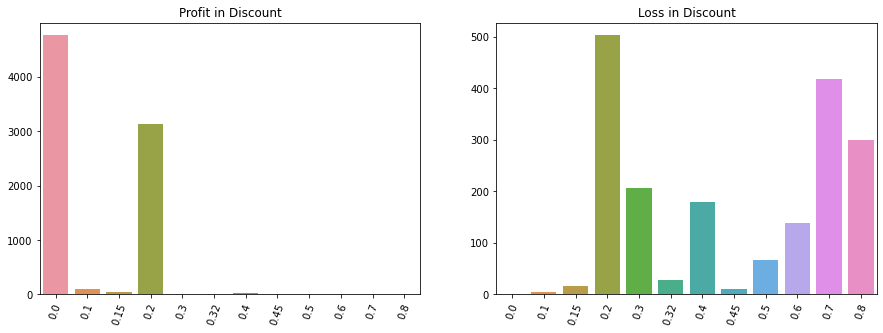

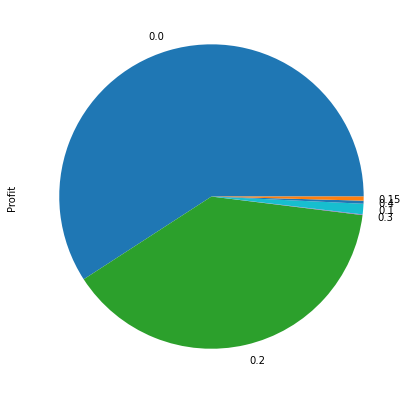

Profit and Loss percentage in the given columns are below
==================== Report ====================

0.0 has the highest profit of 47.68%

0.2 has 2 preference with profit of 31.36%
0.1 has 3 preference with profit of 0.9%


,Values,Profit,Loss,Total
0.0,0.0,47.68,0.00,47.68
0.45,0.45,0.00,0.11,0.11
0.2,0.2,31.36,5.03,36.39
0.8,0.8,0.00,3.00,3.00
0.3,0.3,0.06,2.07,2.13
0.5,0.5,0.00,0.66,0.66
0.7,0.7,0.00,4.19,4.19
0.6,0.6,0.00,1.38,1.38
0.32,0.32,0.00,0.27,0.27
0.1,0.1,0.90,0.04,0.94


In [29]:
show_detial('Discount',data,(15,5),2)

State

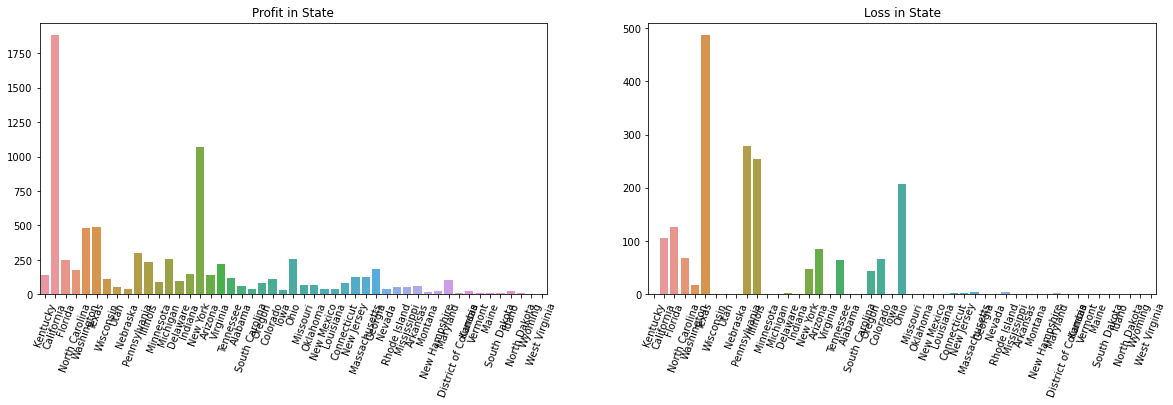

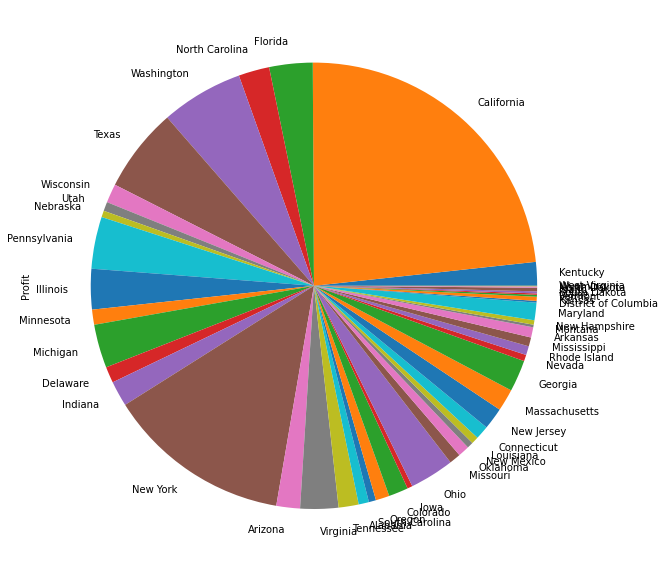

Profit and Loss percentage in the given columns are below
==================== Report ====================

California has the highest profit of 18.83%

New York has 2 preference with profit of 10.75%
Texas has 3 preference with profit of 4.92%


,Values,Profit,Loss,Total
Kentucky,Kentucky,1.38,0.00,1.38
California,California,18.83,1.05,19.88
Florida,Florida,2.53,1.26,3.79
North Carolina,North Carolina,1.80,0.68,2.48
Washington,Washington,4.80,0.17,4.97
Texas,Texas,4.92,4.87,9.79
Wisconsin,Wisconsin,1.10,0.00,1.10
Utah,Utah,0.53,0.00,0.53
Nebraska,Nebraska,0.38,0.00,0.38
Pennsylvania,Pennsylvania,3.03,2.79,5.82


In [30]:
show_detial('State',data,(20,5),10)

Top 20 City 

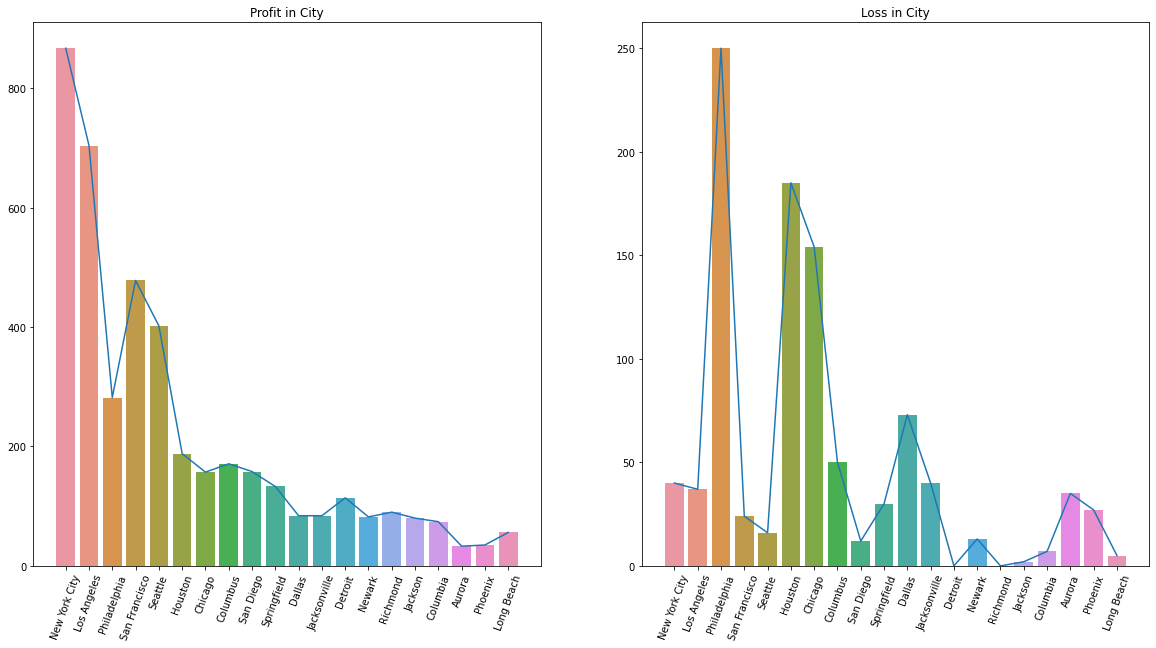

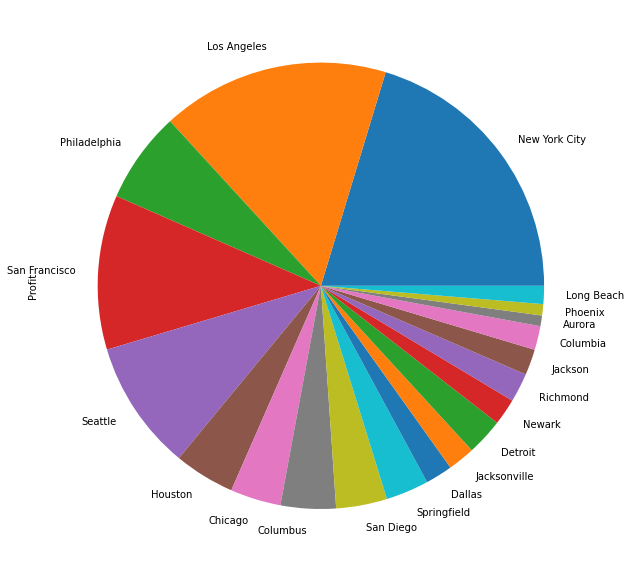

Profit and Loss percentage in the given columns are below
==================== Report ====================

New York City has the highest profit of 8.69%

Los Angeles has 2 preference with profit of 7.06%
San Francisco has 3 preference with profit of 4.79%


,Values,Profit,Loss,Total
New York City,New York City,8.69,0.40,9.09
Los Angeles,Los Angeles,7.06,0.37,7.43
Philadelphia,Philadelphia,2.83,2.51,5.34
San Francisco,San Francisco,4.79,0.24,5.03
Seattle,Seattle,4.03,0.16,4.19
Houston,Houston,1.88,1.85,3.73
Chicago,Chicago,1.57,1.54,3.11
Columbus,Columbus,1.71,0.50,2.21
San Diego,San Diego,1.58,0.12,1.70
Springfield,Springfield,1.33,0.30,1.63


In [31]:
city = data['City'].value_counts()
value = city.index[:20]
show_detial('City',data,(20,10),10,plot = True,top = value.tolist())

### Thankyou